# Twitter Sentiment Analysis with Geo Location

General climate change sentiment of tweets in english, searching for the terms:

- climate change
- global warming
- climate hoax

Timeframe:

**Importing libraries**

In [2]:
#Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Text Processing
#nltk.download('punkt')
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from emoji import UNICODE_EMOJI

**Importing data**

In [3]:
df = pd.read_csv('../Data/tweets_geo.csv', index_col=0)

In [9]:
df.head(3)

,id,date,content,coordinates,place,user,content_clean
0,1394326695260393473,2021-05-17 16:19:24+00:00,"It was a beautiful visit to Coton Manor, in No...",NaN,NaN,"{'username': 'fransherbourne', 'displayname': ...",it was a beautiful visit to coton manor in nor...
1,1394326567174672391,2021-05-17 16:18:53+00:00,A 🇺🇸 U.S. map heating up from 1991 to 2020.\n\...,NaN,NaN,"{'username': 'Jean_Is_fed_up', 'displayname': ...",a us map heating up from 1991 to 2020 global...
2,1394326500804120581,2021-05-17 16:18:37+00:00,#HedgeAZ\nN is for NEW hedges! \nSo much to sa...,NaN,NaN,"{'username': 'FavColour_Green', 'displayname':...",n is for new hedges so much to say– possibly ...


In [6]:
len(df)

108293

In [7]:
df['content'][1]

'A 🇺🇸 U.S. map heating up from 1991 to 2020.\n\n🌎 Global warming 🔥 is a real thing, we know that. \n\nIt’s why we fight 🥊 for change.\n\n3️⃣ words 👁 don’t like! “The New Normal” 🤬\n\nhttps://t.co/AWVXeF85jp\n\n#DemVoice1 #wtpEARTH #wtpBLUE #wtpEDU #ONEV1'

**Cleaning text**

In [4]:
#Turn all words into lowercase
df['content_clean'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
#Clean tweets of special characters (hashtags, mentions, etc.)
def clean_tweets (data, arg):
    x = re.compile(r'{}'.format(arg))
    return x.sub(r'', data)

to_clean = ['https?://\S+|www\.\S+', '<.*?>', '\#(\w*)', '\@(\w*)', '[\.\,\!\?\:\;\-\=]', '[^\W\d]*$']

for i in to_clean:
    df['content_clean'] = df['content_clean'].apply(clean_tweets, arg= i)

In [8]:
def strip_emoji(text):
    RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return RE_EMOJI.sub(r'', text)

df['content_clean'] = df['content_clean'].apply(strip_emoji)

In [10]:
#Removing linebreaks and blankspaces
blanks = ['\s', ' +']

def remove_blankspaces(data, arg):
    x = re.compile(r'{}'.format(arg))
    return x.sub(r' ', data)

for i in blanks:
    df['content_clean'] = df['content_clean'].apply(remove_blankspaces, arg=i)

In [14]:
#cleaned tweet
df['content_clean'][1]

'a us map heating up from 1991 to 2020 global warming is a real thing we know that it’s why we fight for change 3️⃣ words don’t like “the new normal” '

In [8]:
df.head(3)

,id,date,content,coordinates,place,user,content_clean
0,1394326695260393473,2021-05-17 16:19:24+00:00,"It was a beautiful visit to Coton Manor, in No...",NaN,NaN,"{'username': 'fransherbourne', 'displayname': ...","It was a beautiful visit to Coton Manor, in No..."
1,1394326567174672391,2021-05-17 16:18:53+00:00,A 🇺🇸 U.S. map heating up from 1991 to 2020.\n\...,NaN,NaN,"{'username': 'Jean_Is_fed_up', 'displayname': ...",A 🇺🇸 U.S. map heating up from 1991 to 2020.\n\...
2,1394326500804120581,2021-05-17 16:18:37+00:00,#HedgeAZ\nN is for NEW hedges! \nSo much to sa...,NaN,NaN,"{'username': 'FavColour_Green', 'displayname':...",#HedgeAZ\nN is for NEW hedges! \nSo much to sa...


In [25]:
#Cleaning tokens
df['content_clean'] = df['content_clean'].apply(lambda x: " ".join(x for x in x if re.match(r'[^\W\d]*$', x)))

In [29]:
#Removing stop words
stop = stopwords.words('english')
df['content_clean'] = df['content_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [30]:
df['content_clean'][1]

'us map heating global warming real thing know fight change words like new normal'

In [15]:
#Tokanizing tweets
tt = TweetTokenizer()
df['content_clean'] = df['content_clean'].apply(tt.tokenize)

**Predicting Sentiment**

In [32]:
#sentiment with vader
analyzer = SentimentIntensityAnalyzer()

scores = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(df['content_clean'].shape[0]):
    compound = analyzer.polarity_scores(df['content_clean'][i])["compound"]
    pos = analyzer.polarity_scores(df['content_clean'][i])["pos"]
    neu = analyzer.polarity_scores(df['content_clean'][i])["neu"]
    neg = analyzer.polarity_scores(df['content_clean'][i])["neg"]
    
    scores.append({"comp": compound,
                       "positive": pos,
                       "negative": neg,
                       "neutral": neu
                  })
    
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)

In [33]:
df.head(3)

,id,date,content,coordinates,place,user,content_clean,comp,positive,negative,neutral
0,1394326695260393473,2021-05-17 16:19:24+00:00,"It was a beautiful visit to Coton Manor, in No...",NaN,NaN,"{'username': 'fransherbourne', 'displayname': ...",beautiful visit coton manor northamptonshire y...,0.6808,0.228,0.092,0.680
1,1394326567174672391,2021-05-17 16:18:53+00:00,A 🇺🇸 U.S. map heating up from 1991 to 2020.\n\...,NaN,NaN,"{'username': 'Jean_Is_fed_up', 'displayname': ...",us map heating global warming real thing know ...,0.1280,0.232,0.147,0.621
2,1394326500804120581,2021-05-17 16:18:37+00:00,#HedgeAZ\nN is for NEW hedges! \nSo much to sa...,NaN,NaN,"{'username': 'FavColour_Green', 'displayname':...",n new hedges much say possibly another rollerc...,0.7914,0.273,0.071,0.656


In [34]:
#saving data
df.to_csv('../Data/sentiments_geo.csv')

<AxesSubplot:xlabel='negative'>

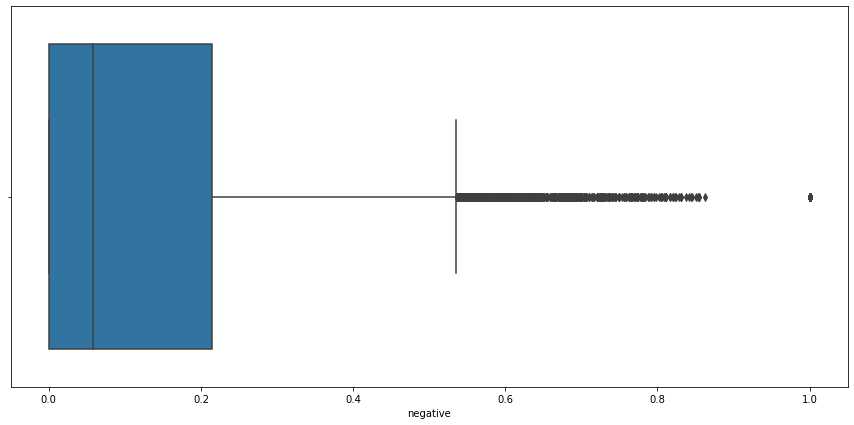

In [35]:
#distribution of polarity
plt.figure(figsize=(15, 7))
sns.boxplot(x = df['negative'])

In [36]:
df[df['negative'] > 0.2]

,id,date,content,coordinates,place,user,content_clean,comp,positive,negative,neutral
3,1394326465567543297,2021-05-17 16:18:29+00:00,"By @amywestervelt: ""Big Oil Is Trying to Make ...",NaN,NaN,"{'username': 'StopMoneyPipe', 'displayname': '...",big oil trying make climate change problem sol...,-0.2263,0.157,0.235,0.609
5,1394326414116245506,2021-05-17 16:18:17+00:00,“Trying to fight educational inequality by get...,NaN,NaN,"{'username': 'ENBrown', 'displayname': 'Elizab...",trying fight educational inequality getting ri...,-0.4019,0.127,0.264,0.609
6,1394326370692616193,2021-05-17 16:18:06+00:00,Climate change optimism should be dead. Show u...,NaN,NaN,"{'username': 'Spencer_Berg_', 'displayname': '...",climate change optimism dead show blow,-0.2023,0.297,0.364,0.339
10,1394326271518253059,2021-05-17 16:17:43+00:00,"Another banger from Freddie deBoer: ""Trying to...",NaN,NaN,"{'username': 'savxgr', 'displayname': 'Cameron...",another banger freddie deboer trying fight edu...,-0.4019,0.105,0.219,0.675
11,1394326159408594948,2021-05-17 16:17:16+00:00,"Of all the stupidest wastes of money, #sacrame...",NaN,NaN,"{'username': 'Soldier4_Truth', 'displayname': ...",stupidest wastes money takes cake fools know i...,-0.7650,0.000,0.398,0.602
...,...,...,...,...,...,...,...,...,...,...,...
108282,1388281023822106625,2021-04-30 23:56:03+00:00,Looks like John Kerry doesn't believe what he ...,NaN,NaN,"{'username': 'conserv_tribune', 'displayname':...",looks like john kerry believe says maybe inste...,-0.3182,0.145,0.220,0.636
108284,1388280994864803842,2021-04-30 23:55:56+00:00,*WE DON'T HAVE A GENERATION TO AVERT THE #Clim...,NaN,NaN,"{'username': 'Bliadhnaichean', 'displayname': ...",generation avert,-0.1779,0.000,0.630,0.370
108285,1388280913507897345,2021-04-30 23:55:37+00:00,'Amtrak Joe': Biden pushes for $80B injection ...,NaN,NaN,"{'username': 'MelanieAlex62', 'displayname': '...",amtrak joe biden pushes injection rail service...,-0.3818,0.000,0.224,0.776
108286,1388280664106147840,2021-04-30 23:54:37+00:00,Climate change: Amazon may be turning from fri...,NaN,NaN,"{'username': 'k_proberts', 'displayname': 'KPR...",climate change amazon may turning friend foe via,0.2500,0.383,0.227,0.391


In [ ]:
#getting positve hashtags
HT_positive = []

def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['content'][df['comp'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive